# Image Segmentation and the Watershed Algorithm

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

## Our Task: Draw Contours Around the Coins

### Common Coin Example
### Naive Approach

In [3]:
sep_coins = cv2.imread('../DATA/pennies.jpg')

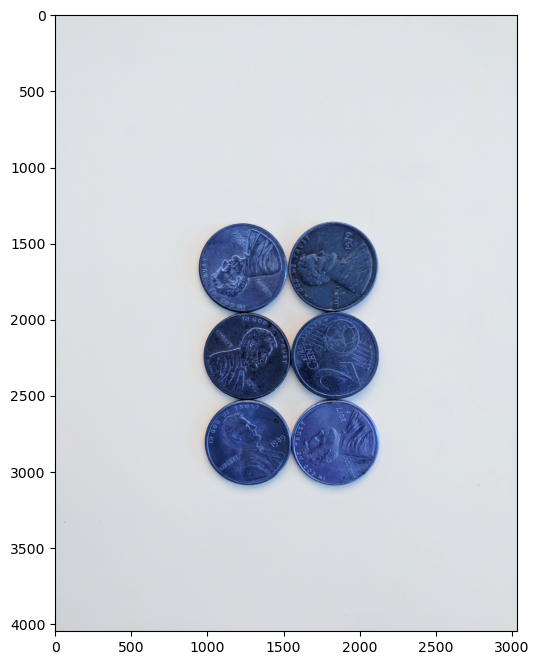

In [4]:
display(sep_coins)

# Apply Median Blurring

In [5]:
sep_blur = cv2.medianBlur(sep_coins,25)

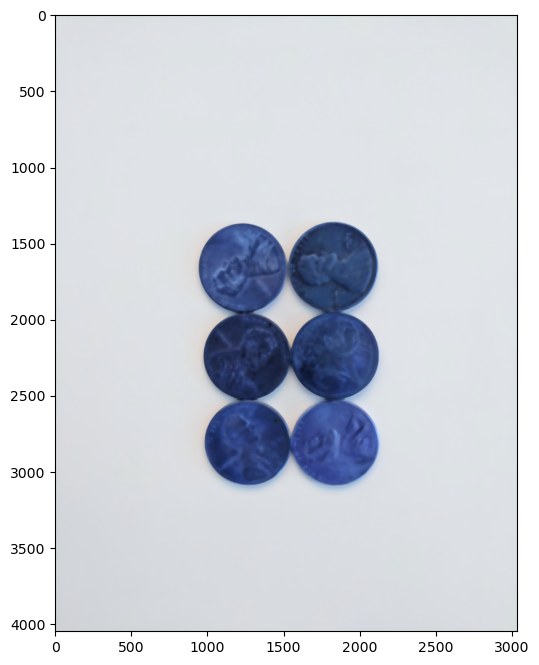

In [6]:
display(sep_blur)

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

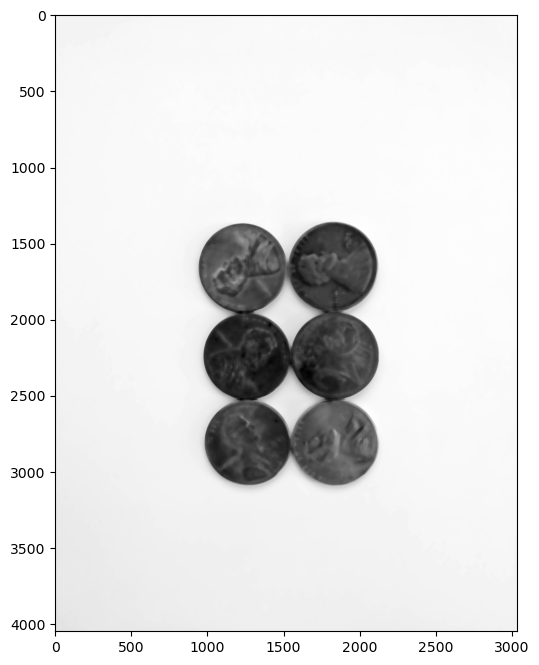

In [8]:
display(gray_sep_coins,cmap='gray')

# Binary Threshold

In [9]:
np.median(gray_sep_coins)

225.0

In [10]:
gray_sep_coins.mean()

205.5519373577674

In [11]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

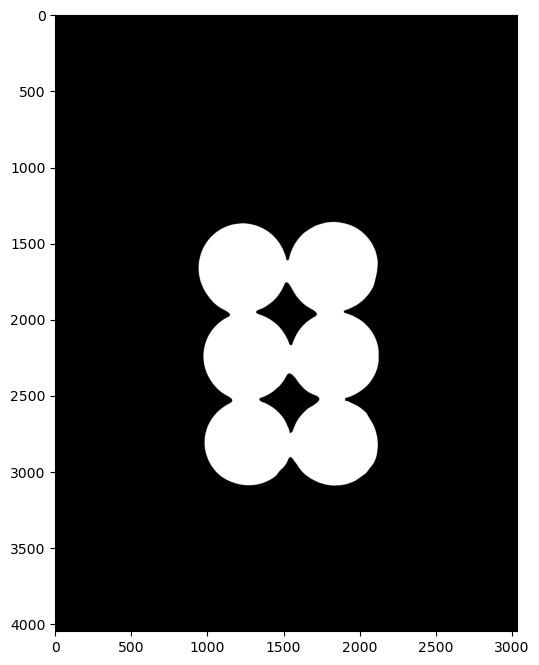

In [12]:
display(sep_thresh,cmap='gray')

# FindContours

In [13]:
image, contours, hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [32]:
hierarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [33]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:        
        cv2.drawContours(sep_coins, contours, i, (255,0,0),10)       

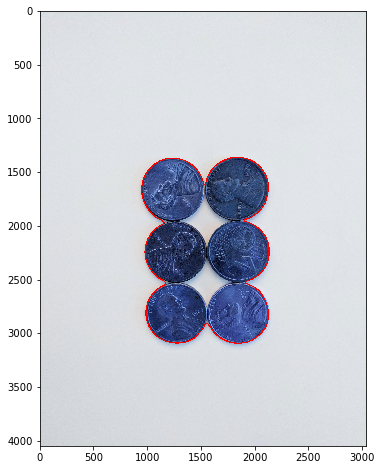

In [34]:
display(sep_coins)

# Watershed Algorithm

#### Step 1: Read Image

In [14]:
img = cv2.imread('../DATA/pennies.jpg')

#### Step 2: Apply Blur

In [15]:
img = cv2.medianBlur(img,35)

#### Step 3: Converting to GrayScale

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#### Step 4: Apply Threshold (inverse binary with OTSU as well)

In [17]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

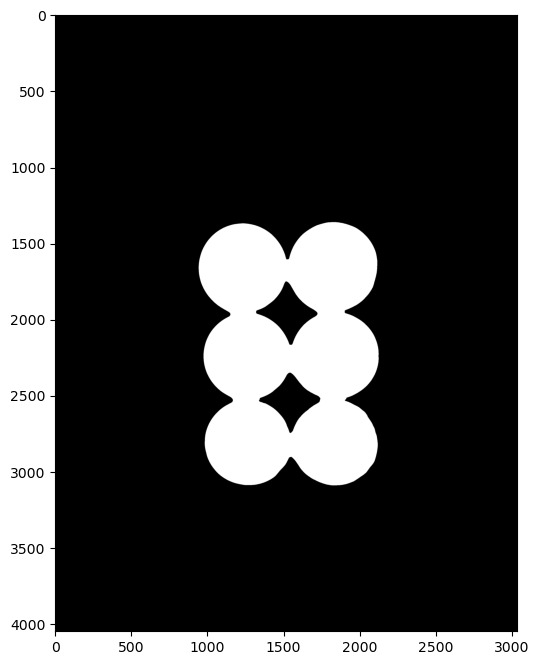

In [18]:
display(thresh,cmap='gray')

#### Optional Step 5: Noise Removal

In [19]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations=2)

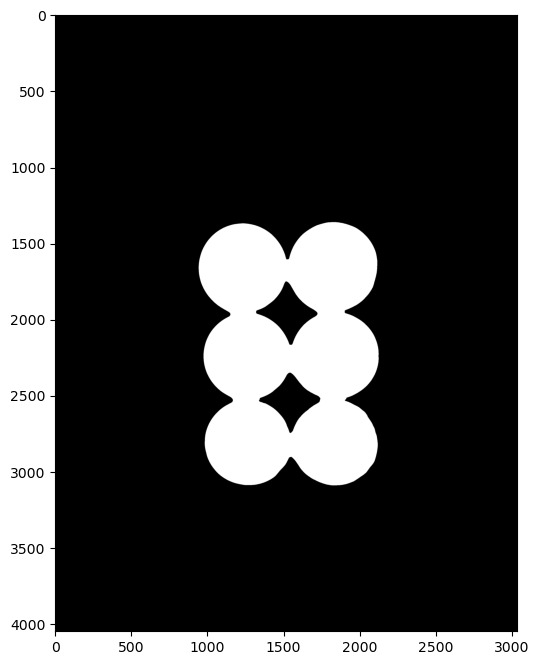

In [20]:
display(opening,cmap='gray')

#### Step 6: Grab Backgroung that you are sure of

In [21]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

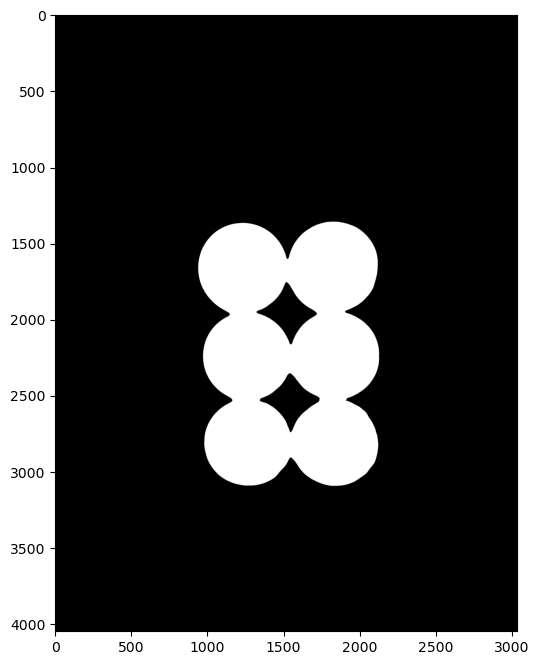

In [22]:
display(sure_bg,cmap='gray')

#### Step 7: Fing Sure Foreground

In [23]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

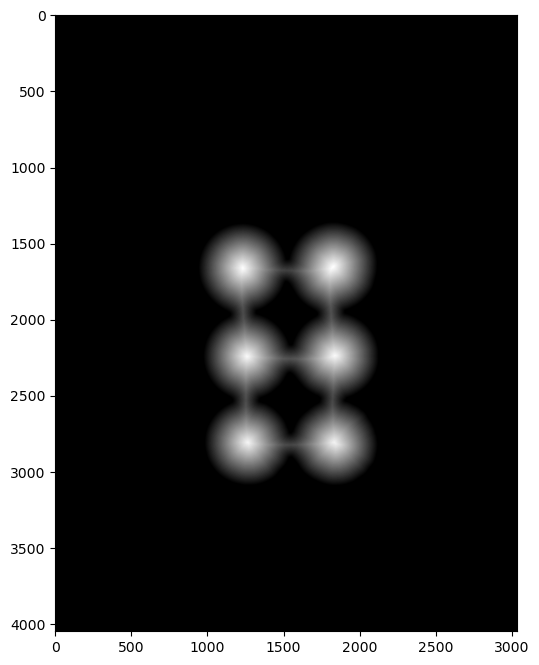

In [24]:
display(dist_transform,cmap='gray')

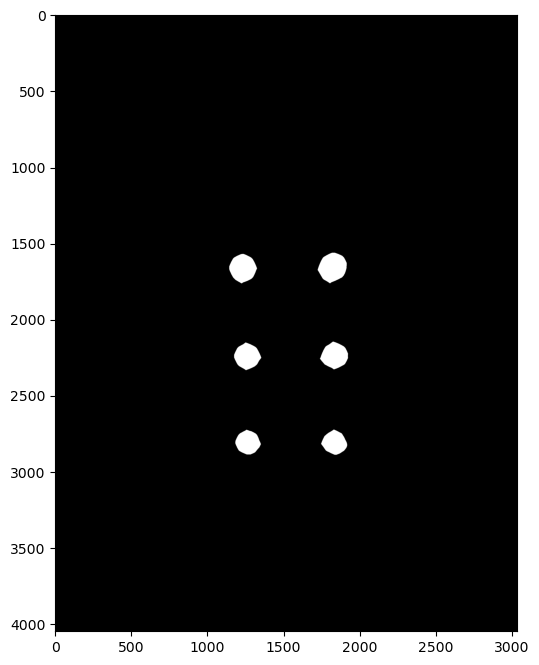

In [25]:
display(sure_fg,cmap='gray')

#### Step 8: Find Unknown Region

In [26]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

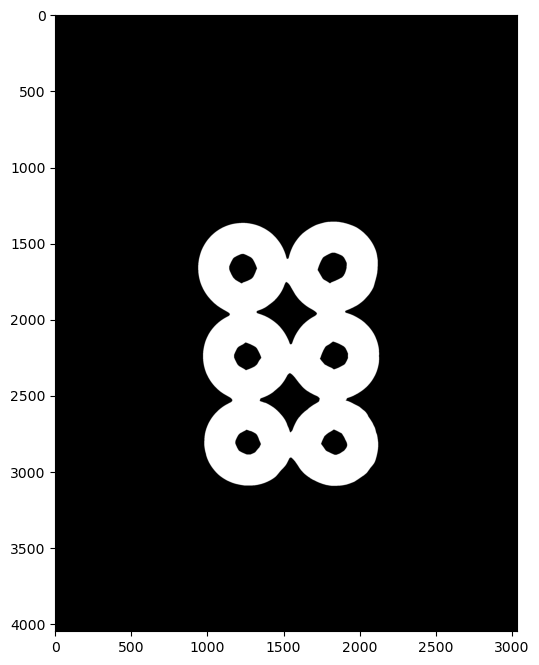

In [27]:
display(unknown,cmap='gray')

#### Step 9: Label Markers of Sure Foreground

In [28]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown == 255] = 0

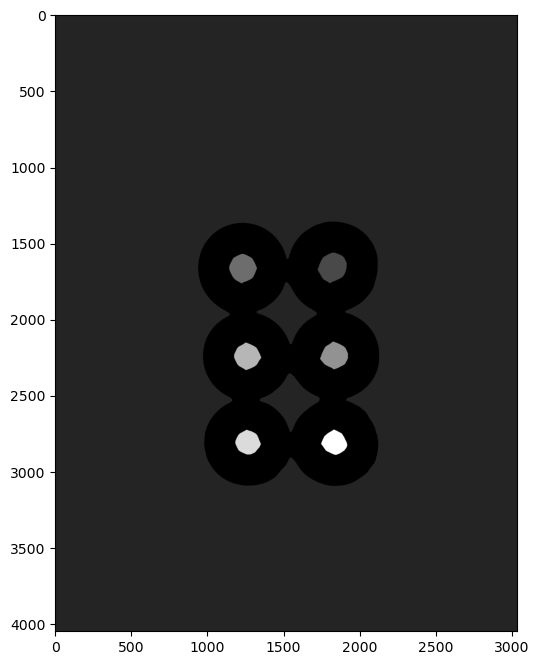

In [29]:
display(markers,cmap='gray')

#### Step 10: Apply Watershed Algorithm to find Markers

In [30]:
markers = cv2.watershed(img,markers)

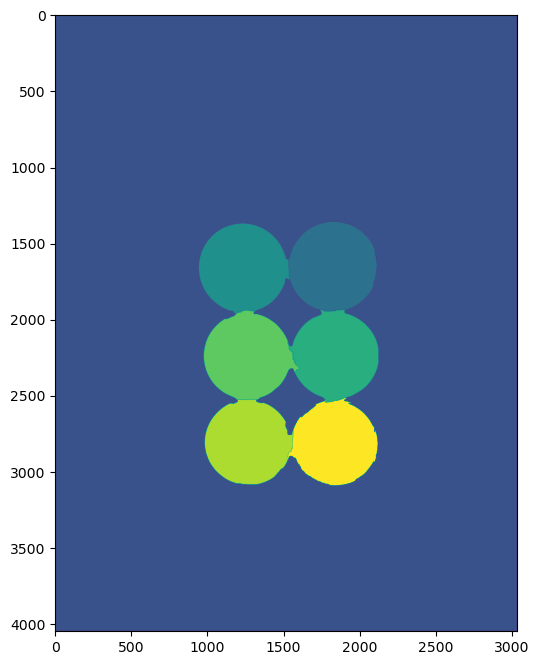

In [31]:
display(markers)

### Step 11: Find Contours on Markers

In [32]:
image, contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        
        cv2.drawContours(sep_coins, contours, i, (255,0,0),10)

ValueError: not enough values to unpack (expected 3, got 2)

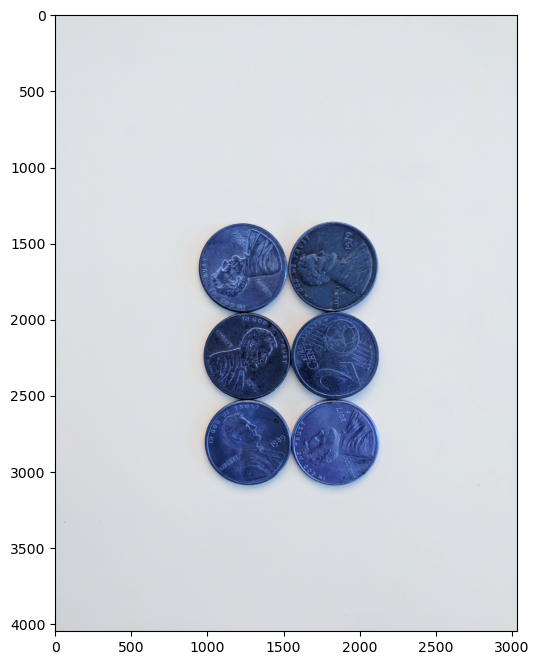

In [33]:
display(sep_coins)